In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

In [2]:

benin = pd.read_csv('./data/benin-malanville.csv')
sierraleone = pd.read_csv('./data/sierraleone-bumbuna.csv')
togo = pd.read_csv('./data/togo-dapaong_qc.csv')

benin['Country'] = 'Benin'
sierraleone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

In [3]:
df_all = pd.concat([benin, sierraleone, togo], ignore_index=True)

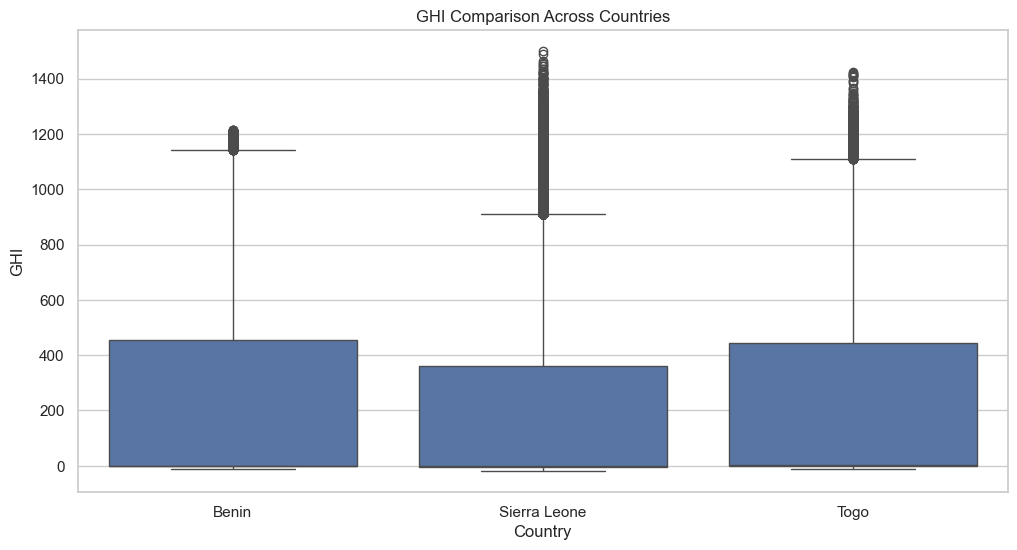

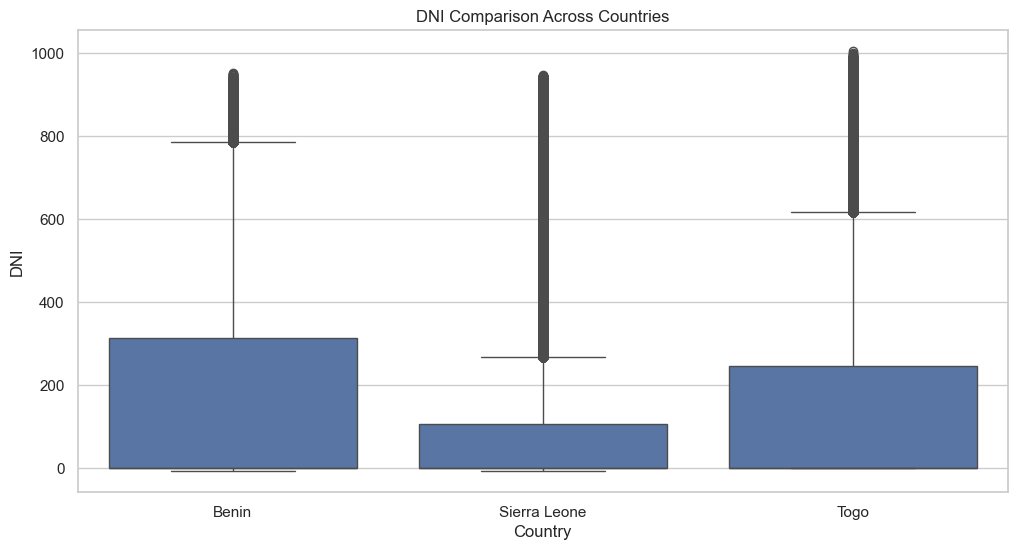

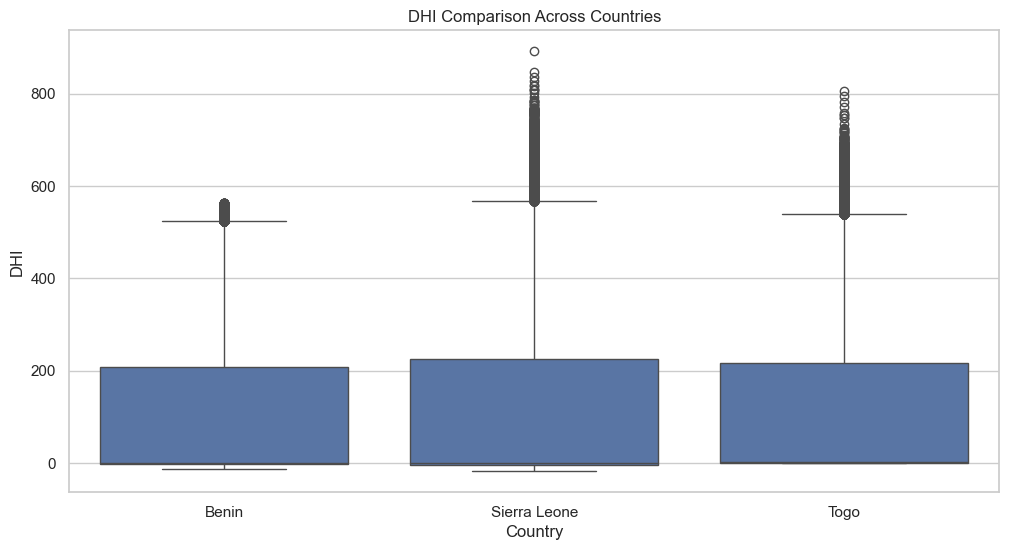

In [4]:
metrics = ['GHI','DNI','DHI']
for metric in metrics:
    if metric in df_all.columns:
        plt.figure()
        sns.boxplot(x='Country', y=metric, data=df_all)
        plt.title(f"{metric} Comparison Across Countries")
        plt.show()


In [ ]:
summary_stats = df_all.groupby('Country')[metrics].agg(['mean','median','std'])
print("Summary Table - GHI, DNI, DHI by Country")
display(summary_stats)

In [5]:
anova_results = {}
for metric in metrics:
    if metric in df_all.columns:
        ghi_benin = df_all[df_all['Country']=='Benin'][metric].dropna()
        ghi_sierraleone = df_all[df_all['Country']=='Sierra Leone'][metric].dropna()
        ghi_togo = df_all[df_all['Country']=='Togo'][metric].dropna()
        
        # Use one-way ANOVA
        f_stat, p_val = stats.f_oneway(ghi_benin, ghi_sierraleone, ghi_togo)
        anova_results[metric] = p_val
        print(f"ANOVA p-value for {metric}: {p_val:.4f}")

ANOVA p-value for GHI: 0.0000
ANOVA p-value for DNI: 0.0000
ANOVA p-value for DHI: 0.0000


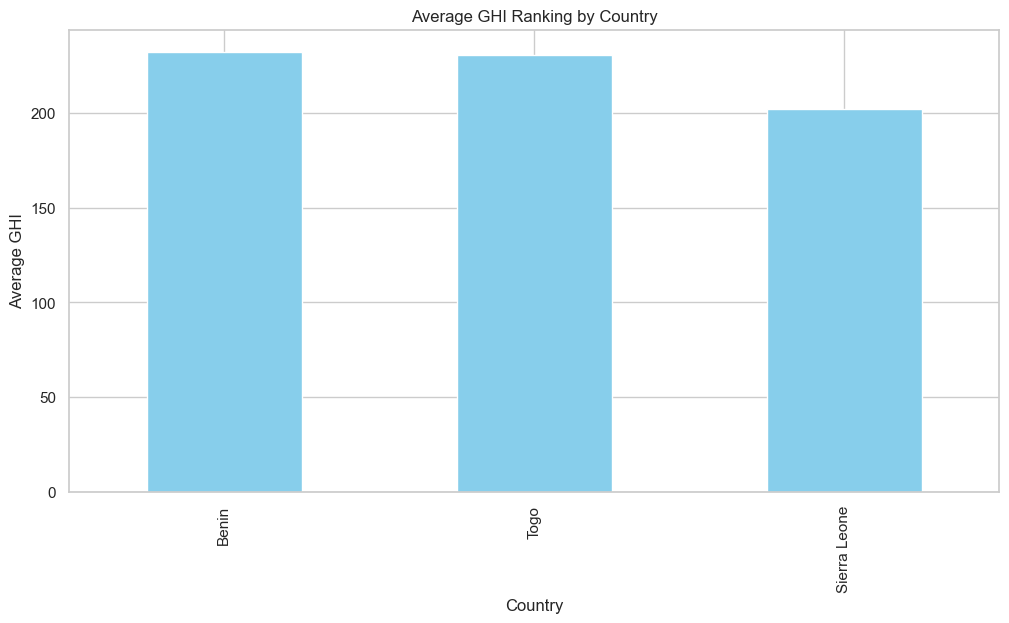

In [6]:
avg_ghi = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)
avg_ghi.plot(kind='bar', color='skyblue')
plt.ylabel('Average GHI')
plt.title('Average GHI Ranking by Country')
plt.show()
